# Import libreries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# load datatset

In [3]:
data = pd.read_csv("Breast_cancer.csv")

In [4]:
#Reading dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#checking data shape
data.shape

(569, 33)

In [5]:
#checking duplicate value 
data.duplicated().sum()

0

In [6]:
##checking null value
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Cleaning & Preparing data

In [5]:
#removing 'Unnamed','id' columns
data.drop(['Unnamed: 32','id'], axis = 1, inplace = True)

In [6]:
# checking categorical and numerical data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [10]:
# lets convert  the categorical variable into numericals variables(diaggnosis)
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

In [11]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


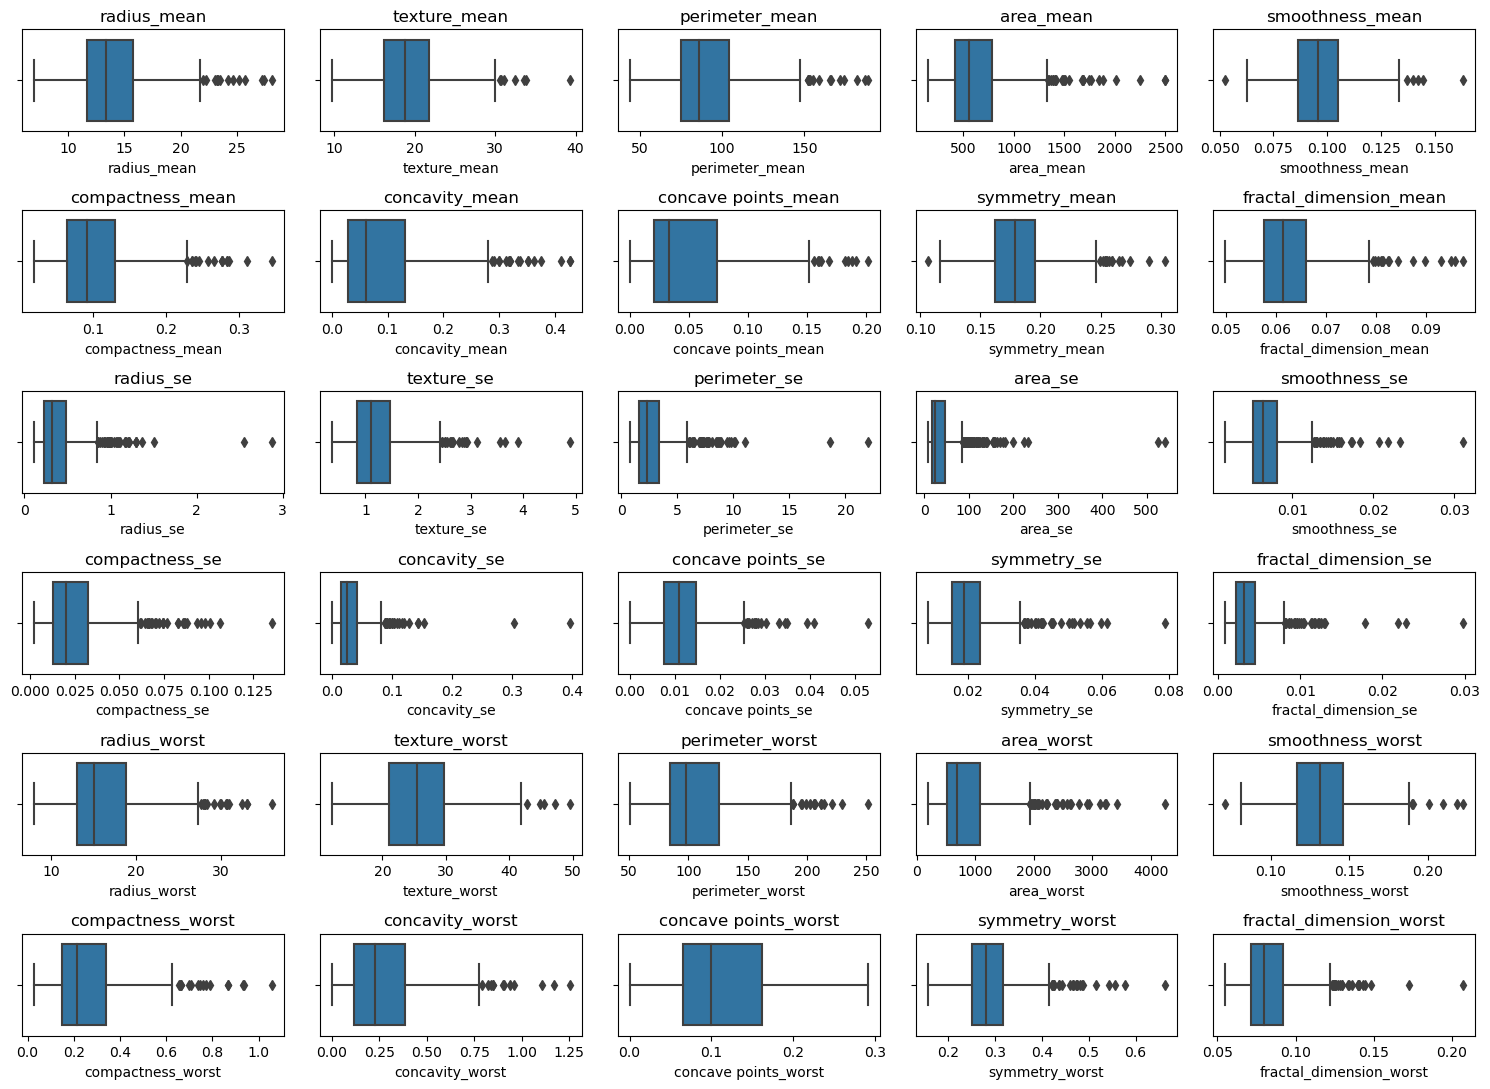

In [13]:
#  checking outliers
plt.figure(figsize = (15,11))
for i, cols in enumerate(data.columns[1:]):
    plt.subplot(6,5, i+1)
    sns.boxplot(x = data[cols])
    plt.title(f'{cols}')
plt.tight_layout()
plt.show()

Each columns have outliers

In [14]:
# lets remove the outliers
for cols in data.columns[0:]:
    data[cols] = data[cols].clip(lower = data[cols].quantile(0.15), upper = data[cols].quantile(0.85))


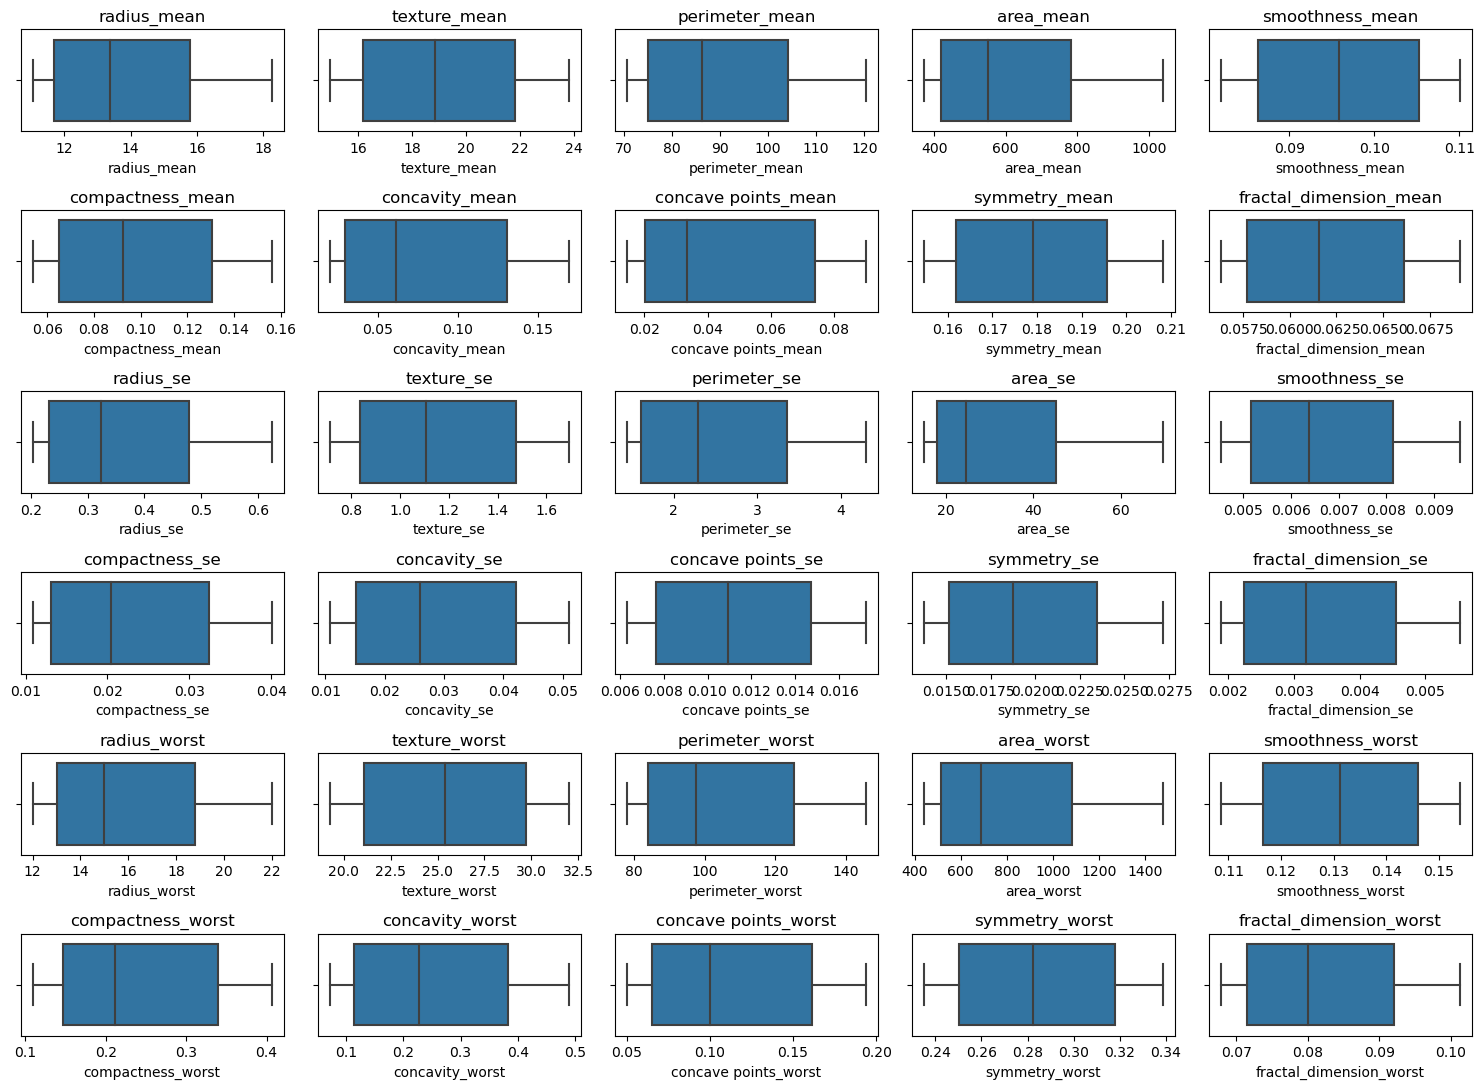

In [15]:
# without  outliers
plt.figure(figsize = (15,11))
for i, cols in enumerate(data.columns[1:]):
    plt.subplot(6,5, i+1)
    sns.boxplot(x = data[cols])
    plt.title(f'{cols}')
plt.tight_layout()
plt.show()

In [16]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
# our dataset already contains the mean value of all columns. lets select only mean columns

feature_mean = data[data.columns[1:11]]
feature_mean.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.990,14.934,120.28,1001.0,0.11008,0.15614,0.16916,0.09022,0.2082,0.069128
1,18.244,17.770,120.28,1038.6,0.08474,0.07864,0.08690,0.07017,0.1812,0.056670
2,18.244,21.250,120.28,1038.6,0.10960,0.15614,0.16916,0.09022,0.2069,0.059990
3,11.420,20.380,77.58,386.1,0.11008,0.15614,0.16916,0.09022,0.2082,0.069128
4,18.244,14.934,120.28,1038.6,0.10030,0.13280,0.16916,0.09022,0.1809,0.058830


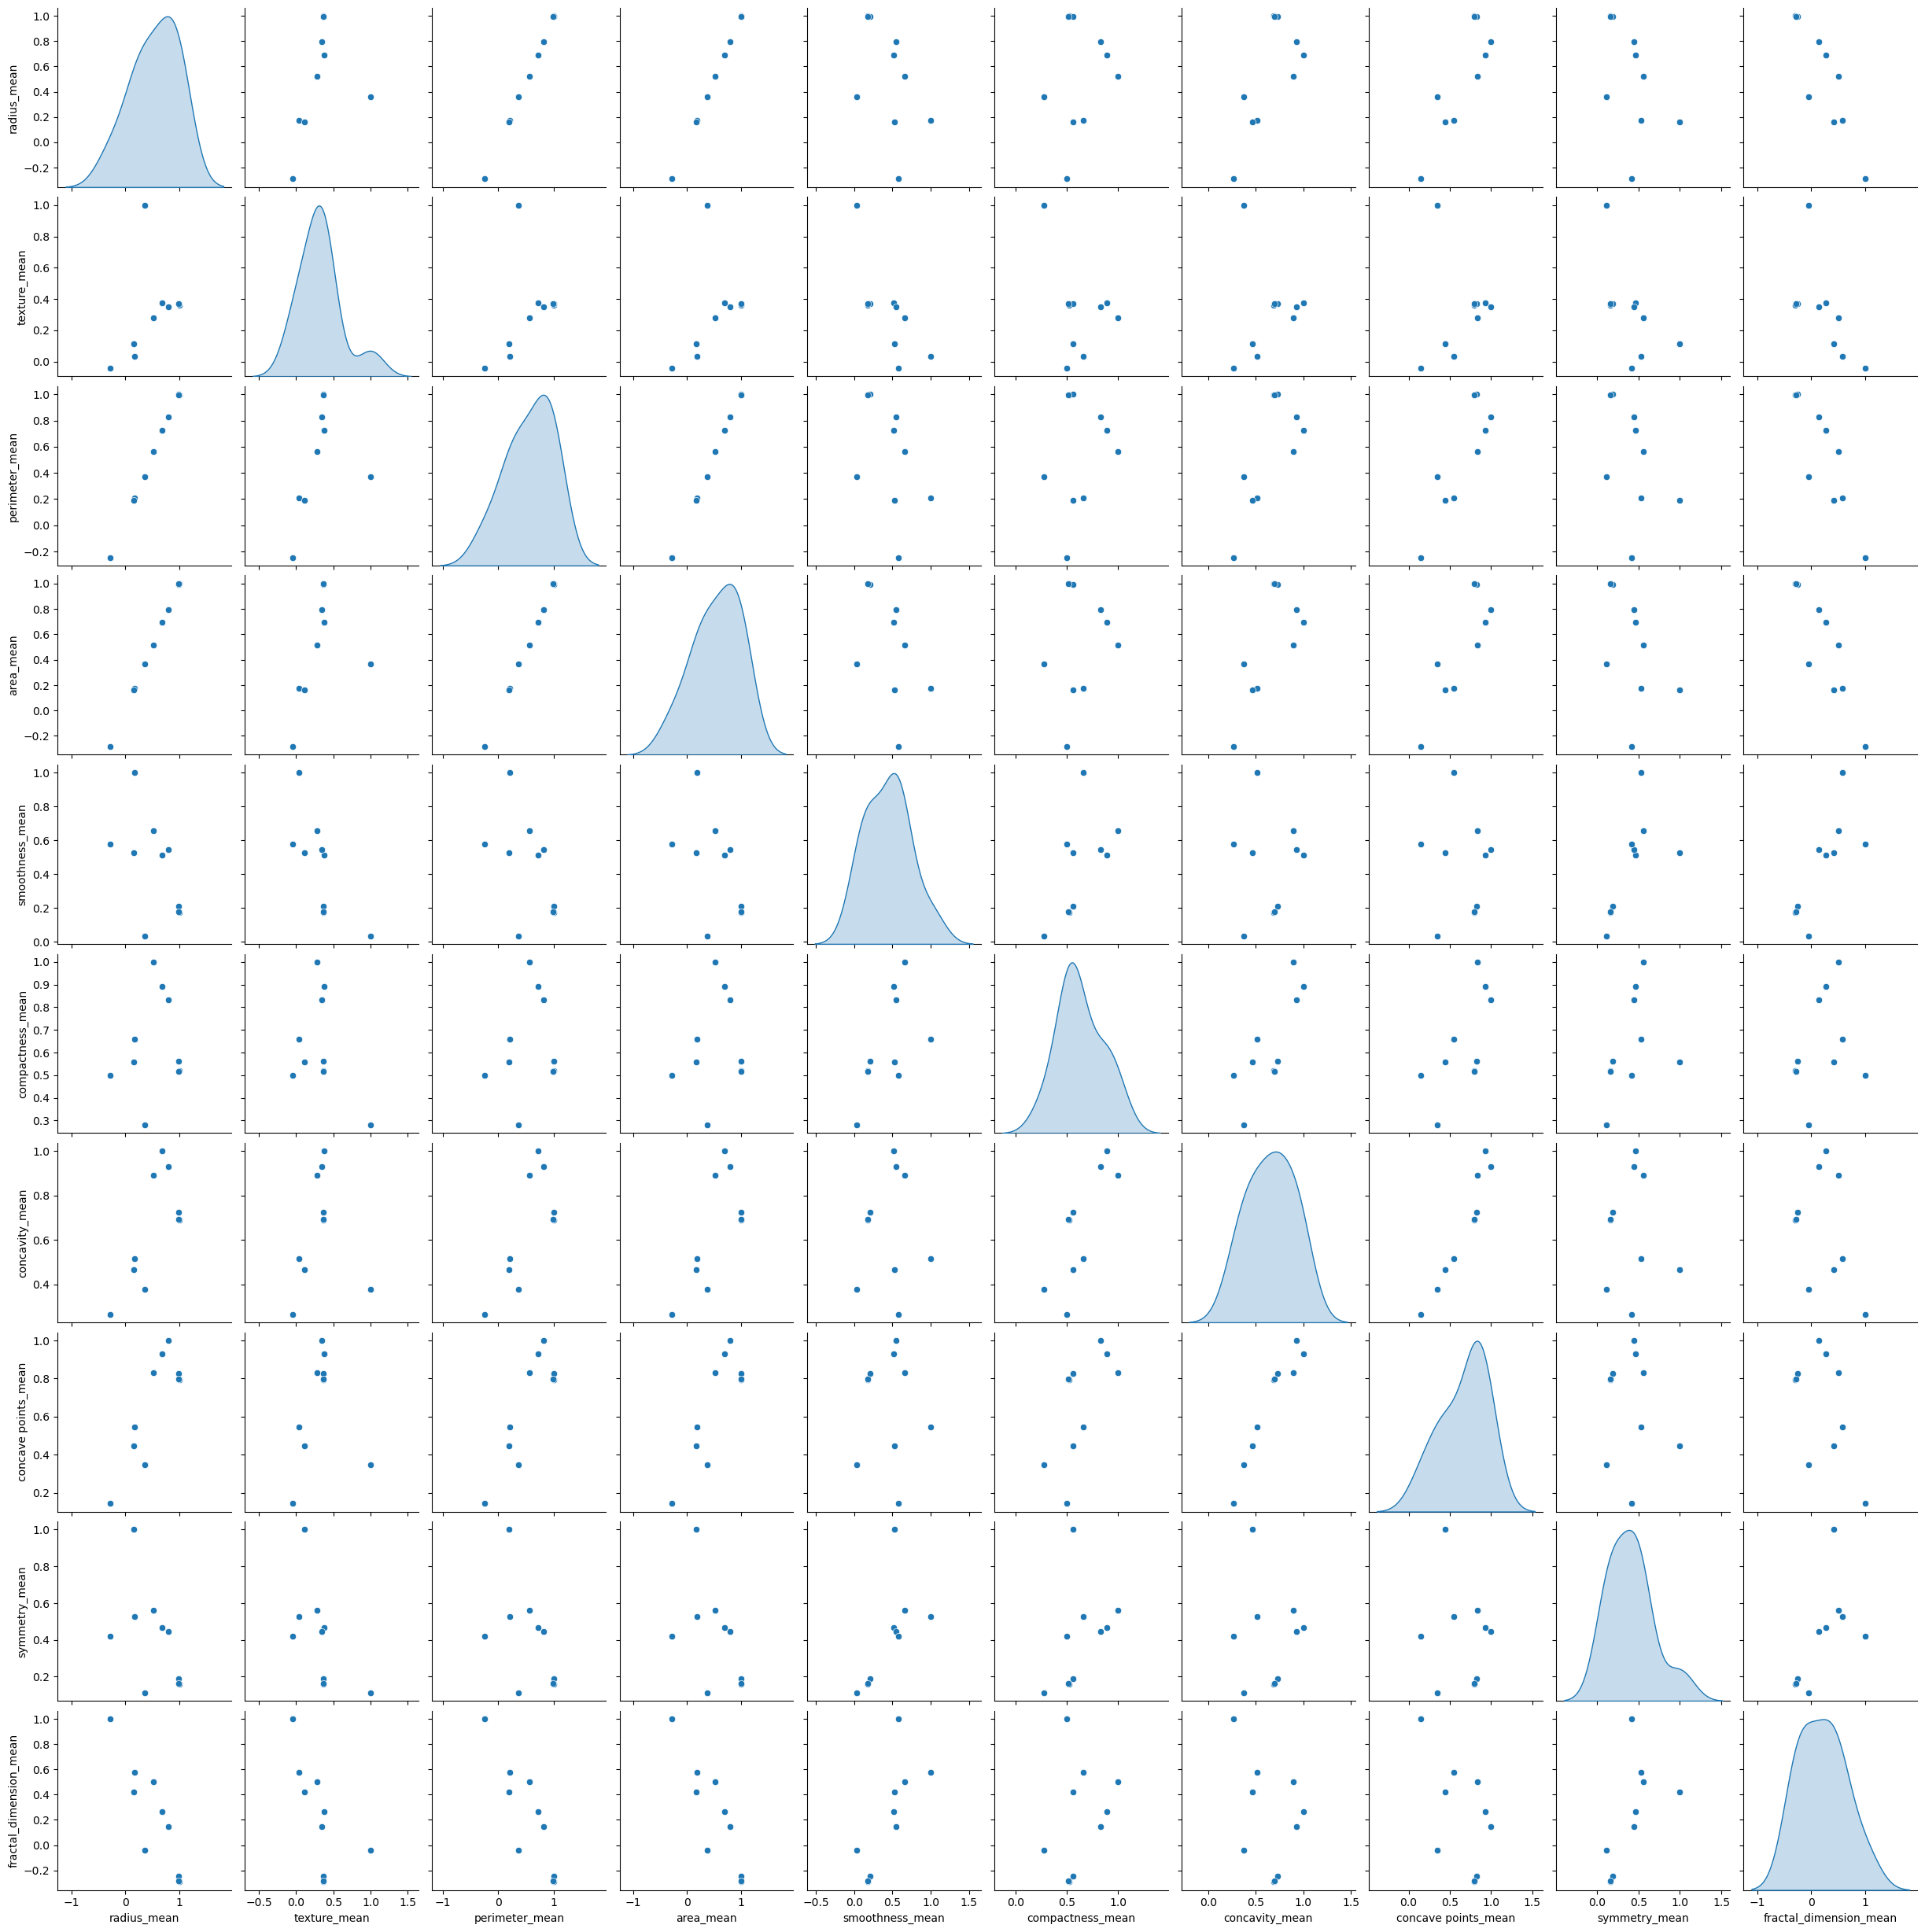

In [18]:
# find the correlation between these columns
sns.pairplot(feature_mean.corr(),diag_kind='kde')
plt.show()

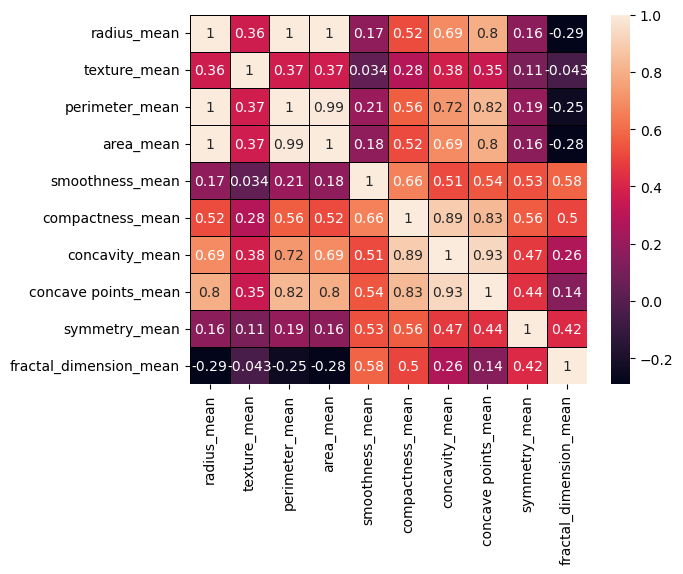

In [19]:
sns.heatmap(feature_mean.corr(), annot=True,square=False, linewidths=0.5, linecolor='black')
plt.show()

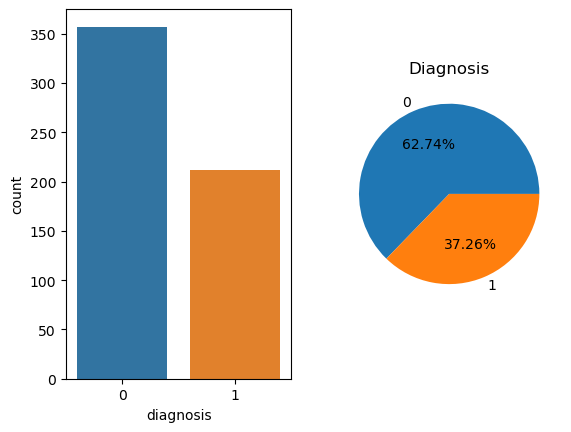

In [20]:
# looking for balance data
plt.subplot(1,2,1)
sns.countplot(x = data['diagnosis'])

plt.subplot(1,2,2)
plt.pie(data['diagnosis'].value_counts(), autopct='%0.2f%%', labels=data['diagnosis'].value_counts().index)
plt.title('Diagnosis')

plt.show()

As we can see our dataset is look like imbalance.

now i am going to balance my dataset

In [21]:

from imblearn.over_sampling import SMOTE

In [22]:
smote = SMOTE()

In [23]:
X = data.iloc[:,1:]

In [24]:
y = data.iloc[:,:1]

In [25]:
X_final, y_final = smote.fit_resample(X,y)

In [26]:
len(X_final)

714

In [27]:
len(y_final)

714

In [28]:
data = pd.concat([X_final, y_final], axis = 1)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

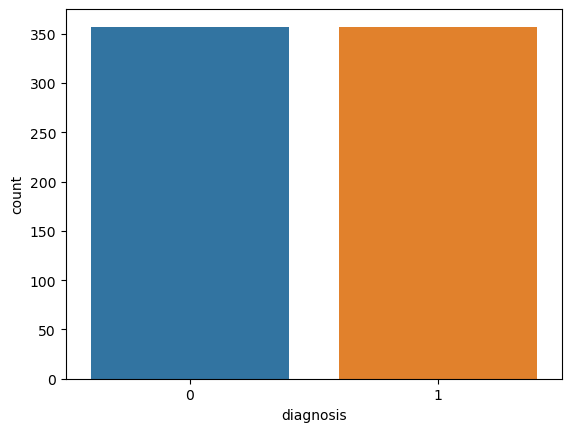

In [29]:
sns.countplot(data['diagnosis'])

Now, Our dataset is balance 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = data.iloc[:,:-1]

In [32]:
y = data.iloc[:,-1:]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [34]:
X_train.shape

(571, 30)

In [35]:
y_train.shape

(571, 1)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression()

In [42]:
lr.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred = lr.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
accuracy = accuracy_score(y_pred, y_test)

In [46]:
accuracy

0.9790209790209791

In [47]:
print(f"Confusion matrix:\n{confusion_matrix(y_pred, y_test)}")
print(f"Classification Report:\n{classification_report(y_pred, y_test)}")


Confusion matrix:
[[68  2]
 [ 1 72]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        70
           1       0.97      0.99      0.98        73

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



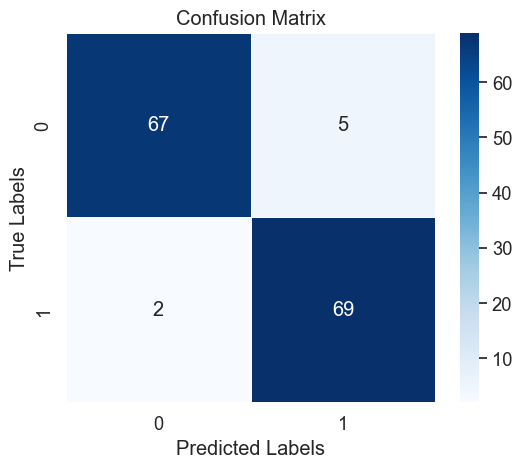

In [71]:
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rc = RandomForestClassifier()

In [50]:
rc.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_pred = rc.predict(X_test)

In [52]:
accuracy = accuracy_score(y_pred,y_test)

In [53]:
accuracy

0.972027972027972

# Naive Bais

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
nb = GaussianNB()

In [56]:
nb.fit(X_train, y_train)

GaussianNB()

In [57]:
y_pred = nb.predict(X_test)

In [58]:
accuracy = accuracy_score(y_pred, y_test)

In [59]:
accuracy

0.951048951048951

# KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier(n_neighbors=1)

In [62]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [63]:
y_predict = knn.predict(X_test)

In [64]:
accuracy1 = accuracy_score(y_predict, y_test)

In [65]:
accuracy1

0.951048951048951

In [66]:
cm = confusion_matrix(y_predict, y_test)

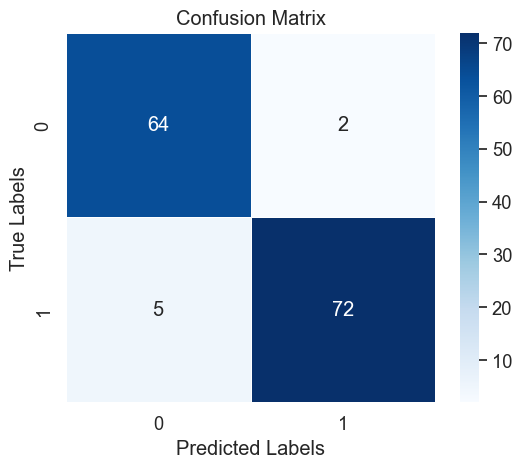

In [67]:
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [68]:
print(f'Classification Report\n{classification_report(y_predict, y_test)}')

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        66
           1       0.97      0.94      0.95        77

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

